# Pré-processamento de dados usando a base de dados de risco de crédito

# Importação das bibliotecas básicas

In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.naive_bayes import GaussianNB

# Base de dados de crédito

- Fonte (adaptado): https://www.kaggle.com/laotse/credit-risk-dataset

### Exploração dos dados

In [3]:
base_credit = pd.read_csv('../datasets/credit_data.csv')

In [4]:
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [5]:
#visualizando os 10 primeiros registros
base_credit.head(10)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [6]:
#visualizando os últimos 10 registros
base_credit.tail(10)

,clientid,income,age,loan,default
1990,1991,34237.575419,34.101654,2658.090632,0
1991,1992,26300.446554,45.539385,2317.393678,0
1992,1993,30803.806165,23.250084,623.024153,0
1993,1994,54421.410155,26.821928,3273.631823,0
1994,1995,24254.700791,37.751622,2225.284643,0
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [7]:
#estatísticas para cada um dos atributos 
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [8]:
#Buscando a pessoa com maior renda na base
base_credit[base_credit['income'] >= 69995.685578]

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [9]:
#buscando a pessoa com menor dívida
base_credit[base_credit['loan'] <= 1.377630]

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


### Visualização dos dados

In [10]:
#contagem de quantos registros existem em cada uma das classes
np.unique(base_credit['default'], return_counts = True)

(array([0, 1]), array([1717,  283]))

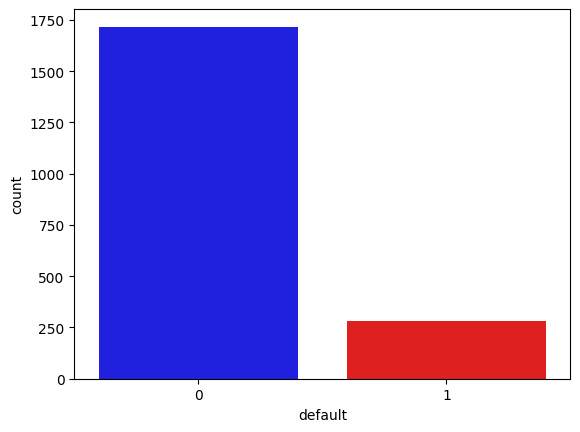

In [11]:
#gerando gráfico de contagem (countplot)
sns.countplot(x=base_credit['default'], hue=base_credit['default'], palette=['blue', 'red'], legend=False);

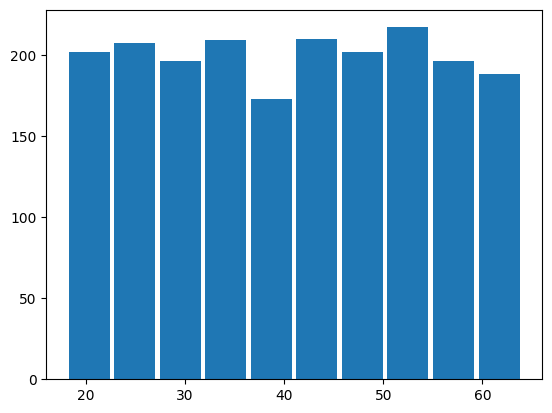

In [50]:
#gerando histograma usando o atributo age
plt.hist(x = base_credit['age'], rwidth=0.9);

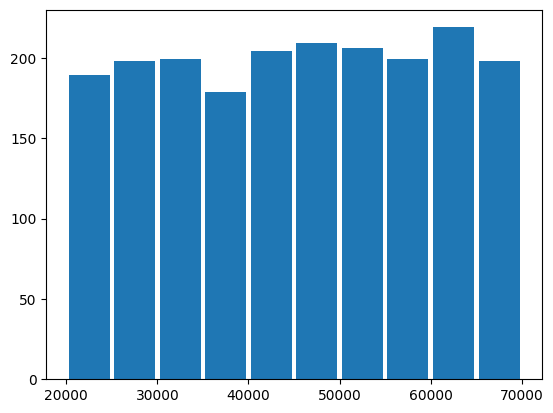

In [13]:
#gerando histograma baseado na renda
plt.hist(x=base_credit['income'], rwidth=0.9);

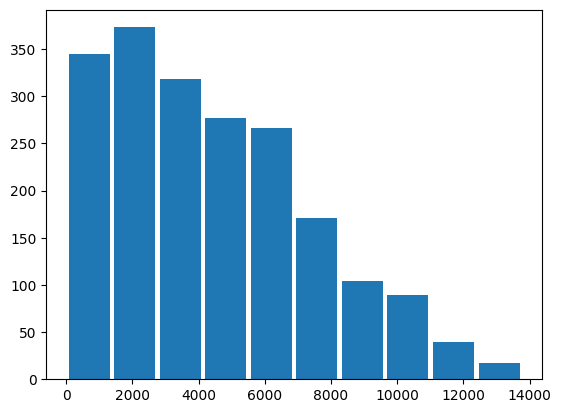

In [14]:
#gerando histrograma baseado na dívida
plt.hist(x=base_credit['loan'], rwidth=0.9);

In [15]:
#gerando gráfico de dispersão combinando age com income e loan, usando default como cor mostrar quem pagou e quem deve
grafico = px.scatter_matrix(base_credit, dimensions=['age','income','loan'], color='default');
grafico.show(renderer="browser")

### Tratamento de valores inconsistentes

In [16]:
#fazendo localização de registros com idade negativa
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [17]:
#outra forma de fazer o mesmo porém usando filtros diretos
base_credit[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [18]:
#há 3 registros com idade inválida, uma das forma de resolver isso é apagando a coluna inteira
base_credit_idade_apagada = base_credit.drop('age', axis = 1)
base_credit_idade_apagada

,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


In [19]:
#outra forma é apagar somente os registos com valores inconsistentes
base_credit_registros_apagados = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit_registros_apagados

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [20]:
#verificando se deu certo 
base_credit_registros_apagados.loc[base_credit_registros_apagados['age'] < 0]

,clientid,income,age,loan,default


In [21]:
#há também uma terceira maneira que é mais recomendável: preencher os valores inconsistentes manualmente
#Quarta forma : preencher os valores inválidos com a média dos mesmos

In [22]:
#preechendo a média de todos os atributos
base_credit.mean()

clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [23]:
#podemos acessar a média filtrando por um atributo
#como estamos usando a base de dados completa esse retorno incluiu as idades inváldias no cálculo
float(base_credit['age'].mean())

40.80755937840458

In [24]:
#vamos buscar os registros que tem idade maior que zero e calcular a média
float(base_credit['age'][base_credit ['age'] > 0].mean())

40.92770044906149

In [ ]:
#agora vamos preencher os valores inválidos com a média
base_credit['age'][base_credit['age'] < 0] = 40.92

In [26]:
#Verificando se a atualização foi bem-sucedida
base_credit.loc[base_credit['age'] < 0 ]

,clientid,income,age,loan,default


In [27]:
#verificando os registros modificados individualmente 
base_credit.head(27)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


### Tratamento de valores faltantes

In [28]:
#verificando valores nulos
base_credit.isnull()

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [29]:
#como são muitos registros a visualização anterior não é tão interessantes
#Vamos fazer o somatório
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [30]:
#visualizando os registros cuja a idade está faltando
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
#Vamos preencher usando a média do atributo age
base_credit['age'].fillna(base_credit['age'].mean(), inplace=True)

In [32]:
#checando se os valores foram atualzados
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default


In [33]:
#visualizando os registros alterados
base_credit.loc[base_credit['clientid'].isin([29, 31, 32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


### Divisão entre previsores e classe

In [34]:
#precisamos de uma variável para o s atributos previsores e outra para a classe
#selecionando as colunas 
X_credit = base_credit.iloc[:, 1:4].values


In [35]:
#verificando valor da variável
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]], shape=(2000, 3))

In [36]:
#verificando o tipo da variável
type(X_credit)

numpy.ndarray

In [37]:
#é 4 pois seria 3 se fosse um intervalo
Y_credit = base_credit.iloc[:, 4].values

In [38]:
#verificando o valor da variável
Y_credit

array([0, 0, 0, ..., 1, 0, 0], shape=(2000,))

In [39]:
#verificando tipo
type(Y_credit)

numpy.ndarray

### Escalonamento dos valores

In [40]:
#atributos previsores
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]], shape=(2000, 3))

In [41]:
#Podemos visualizar o menor valor das colunas 
float(X_credit[:, 0].min()), float(X_credit[:, 1].min()),float(X_credit[:, 2].min())

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [42]:
#visualizando o maior valor das colunas
float(X_credit[:, 0].max()), float(X_credit[:, 1].max()), float(X_credit[:, 2].max())

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [43]:
# como há uma diferença muito grande de escala entre os atributos isso pode causar distorções
# pois os algoritmos podem atribuir pesos muito grandes ao atributo devido a seu valor alto
# então e importante deixar os valores na mesma escala
# podemos usar os cálculos da padronização ou normalização
# padronização é mais indicada quando temos outliers na base de dados como os valores negativos na coluna idade 
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)


In [44]:
#agora vamos comparar os valores mínimos e máximos novamente
float(X_credit[:, 0].min()), float(X_credit[:, 1].min()),float(X_credit[:, 2].min())

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [45]:
float(X_credit[:, 0].max()), float(X_credit[:, 1].max()), float(X_credit[:, 2].max())

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

In [46]:
#checando resultado
X_credit

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]], shape=(2000, 3))

# Divisão da base em treinamento e teste

In [48]:
from sklearn.model_selection import train_test_split

In [ ]:
# separando os atributos previsores e classe em uma porção para treinamento e outra para teste
X_credit_treinamento, X_credit_teste, Y_credit_treinamento, Y_credit_teste = train_test_split(X_credit, Y_credit, test_size = 0.25, random_state = 0)

In [ ]:
# verificando variável de treinamento dos atributos previsores
# como definido no método naterior temos 75% dos dados nas bases de treinamento e 25% nas bases de teste
X_credit_treinamento.shape

(1500, 3)

In [ ]:
# verificando variável de treinamento dos atributos clase
Y_credit_treinamento.shape

(1500,)

In [55]:
X_credit_teste.shape, Y_credit_teste.shape

((500, 3), (500,))

# Salvando as bases

In [172]:
import pickle

In [60]:
with open('../datasets/processed/credit.pkl', mode='wb') as f:
    pickle.dump([X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste], f)

# Aplicando algoritmo Naive Bayes

In [ ]:
# Carregando dados processados 
with open('../datasets/processed/credit.pkl', 'rb') as f:
    X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste = pickle.load(f)

In [ ]:
# crianto algoritmo e aplicando treinamento para geração da tabela de probabilidade
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_treinamento, Y_credit_treinamento)

,priors,None
,var_smoothing,1e-09


In [ ]:
# fazendo previsões usando a base de teste
previsoes = naive_credit_data.predict(X_credit_teste)

In [180]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# Exibindo a resposta real para comparar com as previões
Y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [194]:
# como é muito difícil verificar 1 por 1 vamos usar métricas para medir a precisão
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# calculando precisão
accuracy_score(Y_credit_teste, previsoes)

0.938

In [ ]:
# Gerando matriz de confusão, linha 0 clientes que pagam, linha 1 clientes que não pagam
confusion_matrix(Y_credit_teste, previsoes)

array([[428,   8],
       [ 23,  41]])

In [192]:
# usando matriz de confusão do yellowbrick
from yellowbrick.classifier import ConfusionMatrix

0.938

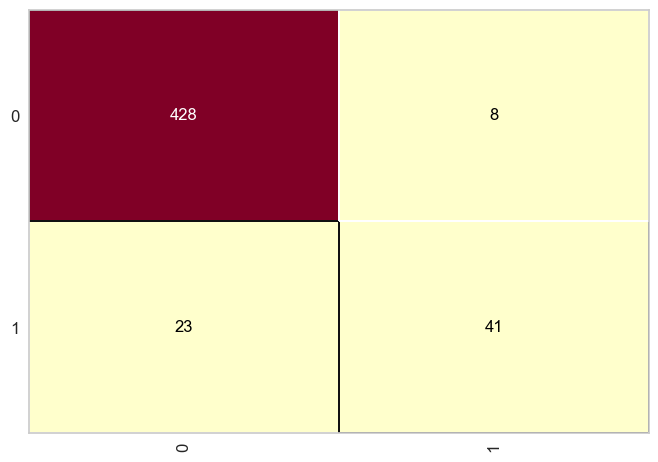

In [ ]:
# para ler uma matrix de confusão verificamos a intersecções entre os valores 
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento, Y_credit_treinamento)
cm.score(X_credit_teste, Y_credit_teste)

In [195]:
# Gerando relatório de classificação
print(classification_report(Y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



# Aplicando algoritmo de árvore de decisão

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Carregando dados processados 
import pickle
with open('../datasets/processed/credit.pkl', 'rb') as f:
    X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste = pickle.load(f)

In [4]:
X_credit_treinamento.shape, Y_credit_treinamento.shape

((1500, 3), (1500,))

In [5]:
X_credit_teste.shape, Y_credit_teste.shape

((500, 3), (500,))

In [7]:
# criando arvore e treinando modelo 
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(X_credit_treinamento, Y_credit_treinamento)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
# gerando previsões
previsoes = arvore_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [9]:
# Verificando repostas reais para comparação com a previsão
Y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [10]:
# gerando métricas
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
accuracy_score(Y_credit_teste, previsoes)

0.982

0.982

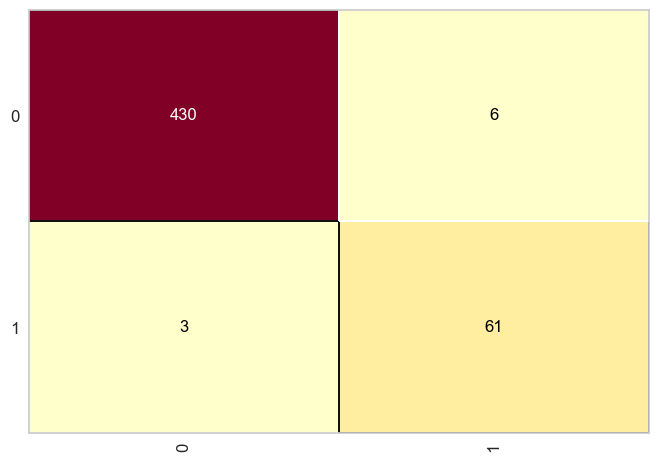

In [13]:
# gerando matriz de confusão
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, Y_credit_treinamento)
cm.score(X_credit_teste, Y_credit_teste)

In [14]:
print(classification_report(Y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



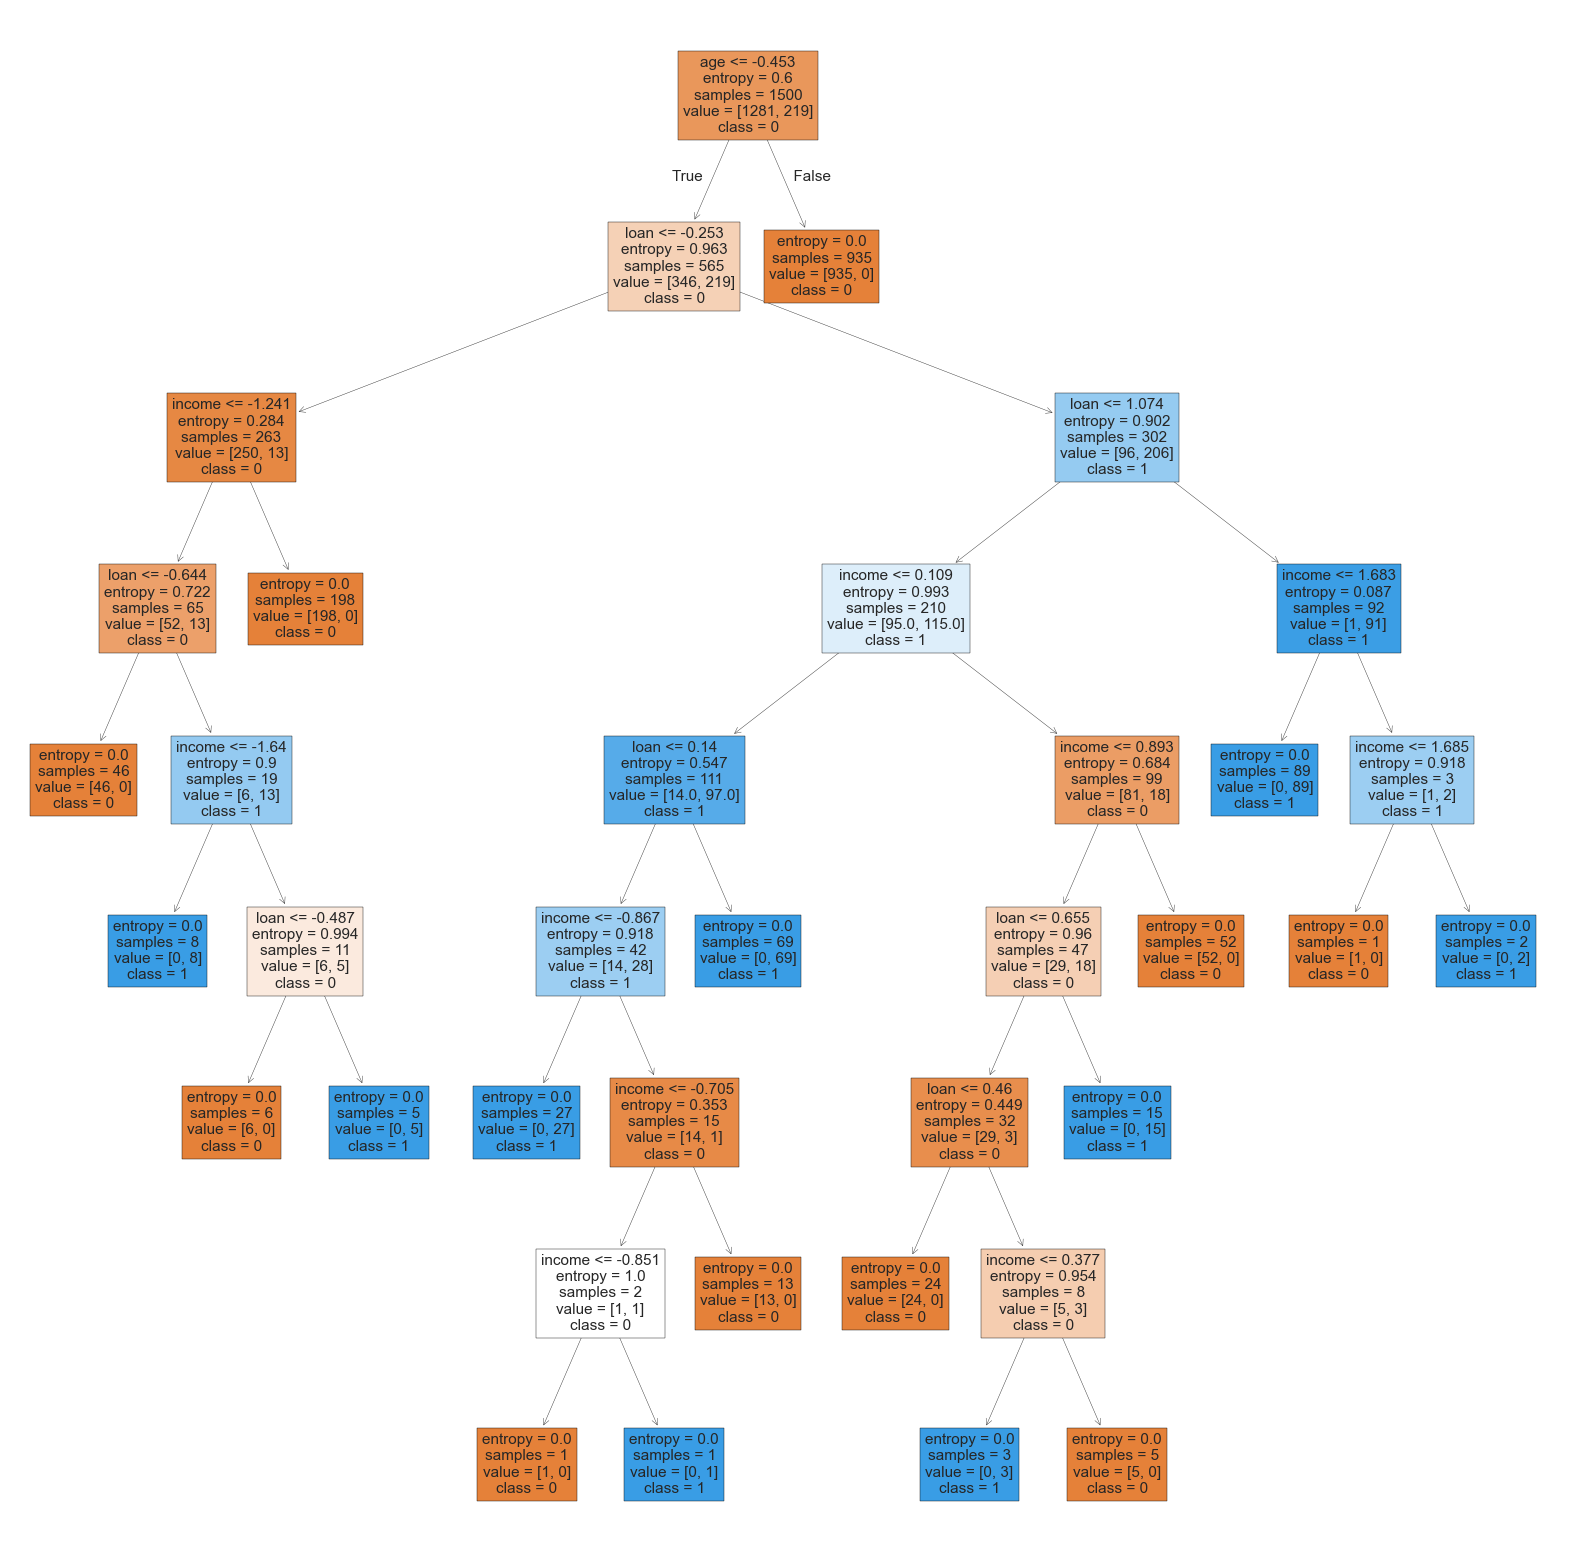

In [18]:
# visualizando arvore de decisão
from sklearn import tree
import matplotlib.pyplot as plt
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=['0','1'], filled=True);

# Aplicando random forest

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
# carregando dados processados
import pickle
with open('../datasets/processed/credit.pkl', 'rb') as f:
    X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste = pickle.load(f)

In [6]:
X_credit_treinamento.shape, Y_credit_treinamento.shape

((1500, 3), (1500,))

In [7]:
X_credit_teste.shape, Y_credit_teste.shape

((500, 3), (500,))

In [25]:
# criando random forest implementando random forest
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
random_forest_credit.fit(X_credit_treinamento, Y_credit_treinamento)

# b_estimators corresponde ao número de arvores

,n_estimators,40
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
# gerandio previsoes
previsoes = random_forest_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [33]:
# exibindo respostas reais para comparação com as previões
Y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [34]:
# importando métricas
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#precisão
accuracy_score(Y_credit_teste, previsoes)

0.984

0.984

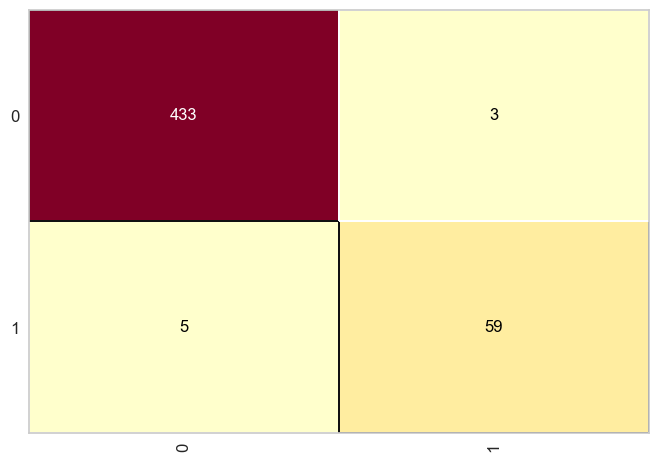

In [35]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_credit)
cm.fit(X_credit_treinamento, Y_credit_treinamento)
cm.score(X_credit_teste, Y_credit_teste)

In [36]:
print(classification_report(Y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



# Aprendizado por regras

In [1]:
import Orange

In [ ]:
# Carregando dados, precisamos da base no formato do orange por isso não usaremos pandas
# leitura direta do arquivo csv
# carregando uma versão atualizada da base credit_data adicionando a notação c# no atributo classe para o orange interpretá-lo como tal
# esse algoritmo consegue trabalhar com atributos categoricos, ou seja, não há necessidade de usar nenhum tipo de encoder
base_credito = Orange.data.Table('../datasets/credit_data_regras.csv')

In [ ]:
# com a notação c# ele dive os atributos entre classe e previsores
# com a notação i# ele ignora um atributo, nesse caso usamos no ID ja que esse atributo não será usado no treinamento
base_credito

[[66155.9, 59.017, 8106.53 | 0],
 [34415.2, 48.1172, 6564.75 | 0],
 [57317.2, 63.108, 8020.95 | 0],
 [42709.5, 45.752, 6103.64 | 0],
 [66952.7, 18.5843, 8770.1 | 1],
 ...
]

In [4]:
base_credito.domain

[income, age, loan | default]

In [8]:
# separando a base em treinamento e teste
base_dividida = Orange.evaluation.testing.sample(base_credito, n=0.25)
base_dividida

([[23057.4, 46.9718, 2487.17 | 0],
  [40831.8, 47.1495, 6429.59 | 0],
  [65137.9, 42.1331, 10352.2 | 0],
  [28481.3, 47.4213, 5302.18 | 0],
  [33265.8, 21.5835, 5968.44 | 1],
  ...
 ],
 [[69579.9, 57.7562, 10868.2 | 0],
  [67949.7, 34.4797, 1790.35 | 0],
  [42242.5, 34.2208, 2070.38 | 0],
  [22209, 22.0063, 4096.78 | 1],
  [22076.9, 56.9954, 3948.14 | 0],
  ...
 ])

In [9]:
base_dividida[0]

[[23057.4, 46.9718, 2487.17 | 0],
 [40831.8, 47.1495, 6429.59 | 0],
 [65137.9, 42.1331, 10352.2 | 0],
 [28481.3, 47.4213, 5302.18 | 0],
 [33265.8, 21.5835, 5968.44 | 1],
 ...
]

In [10]:
base_dividida[1]

[[69579.9, 57.7562, 10868.2 | 0],
 [67949.7, 34.4797, 1790.35 | 0],
 [42242.5, 34.2208, 2070.38 | 0],
 [22209, 22.0063, 4096.78 | 1],
 [22076.9, 56.9954, 3948.14 | 0],
 ...
]

In [11]:
# não há necessidade de fazer a divisão entre atributos previsores e classe
# a base de treinamento esta na posição 1
base_treinamento = base_dividida[1]

In [13]:
base_teste = base_dividida[0]

In [14]:
# checando a divisão dos dados
len(base_treinamento), len(base_teste)

(1500, 500)

In [15]:
# criando algoritmo
cn2 = Orange.classification.rules.CN2Learner()
regras_credito = cn2(base_treinamento)

In [16]:
# visualizando regras geradas
for regras in regras_credito.rule_list:
    print(regras)

IF age>=34.851817262359 THEN default=0 
IF loan<=2495.13299137587 AND income>=20145.9885970689 THEN default=0 
IF income<=31702.3342987522 AND loan>=3665.88089899456 THEN default=1 
IF loan>=7708.31562497011 AND loan>=9601.375482171099 THEN default=1 
IF income>=54421.054006088496 AND income>=69695.1504494064 THEN default=1 
IF income>=54421.054006088496 AND age>=33.8957485635765 THEN default=0 
IF age>=23.4877088945359 AND loan>=7718.479795185201 THEN default=1 
IF income>=53493.4860118665 AND age>=29.910983558744196 THEN default=0 
IF income>=53493.4860118665 AND age>=29.636369307525502 THEN default=1 
IF income>=53493.4860118665 AND income>=67420.59544660151 THEN default=0 
IF loan>=6043.14310633161 AND age>=29.36146192858 THEN default=1 
IF age>=33.4312054850161 AND income>=34237.5754192472 THEN default=0 
IF loan>=6803.33339273416 AND loan>=9595.28628892989 THEN default=0 
IF loan>=6803.33339273416 AND age>=28.9600249473006 THEN default=0 
IF loan>=6111.961017092231 AND age>=28.02

In [17]:
# fazendo previsões
previsoes = Orange.evaluation.testing.TestOnTestData(base_treinamento, base_teste, [lambda testdata: regras_credito])

In [18]:
previsoes

In [19]:
# Calculando precisão do modelo
Orange.evaluation.CA(previsoes)

array([0.974])

# Classificador base - Majority learner

In [2]:
import Orange

In [ ]:
# carregando dados
base_credito = Orange.data.Table('../datasets/credit_data_regras.csv')

In [4]:
base_credito.domain

[income, age, loan | default]

In [ ]:
# fazendo treinamento
majority = Orange.classification.MajorityLearner()

In [ ]:
# fazendo previsões
previsoes = Orange.evaluation.testing.TestOnTestData(base_credito, base_credito, [majority])

In [9]:
# calculando precisão
Orange.evaluation.CA(previsoes)

array([0.8585])

In [ ]:
# exibindo a classe dos registors
for registro in base_credito:
    print(registro.get_class())

0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0


In [ ]:
# contagem das classes
from collections import Counter
Counter(str(registro.get_class()) for registro in base_credito)

Counter({'0': 1717, '1': 283})

In [15]:
# divindo 1717 pelo total de registro que é 2000 teremos a precisão
1717 / 2000

0.8585

Todos os novos registros seram classificados como 0 pois a maioria dos registros da base pertence a essa classe

Usando majority learner podemos considerar ou não o uso de certos algoritmos, se algum algoritmo de classificação tiver uma precisão menor que o majority learner então talvez não valha a pena usá-los 